# <center>Employee Tournover Prediction </center>

### <center>By **Noé Kokou ACHIBE** </center>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Employee Data into DataFrame
df  = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.isna().sum().mean()

0.0

### Observation:
1. No missing values in the data

# Data Preprocessing

In [5]:
### replacing "Yes" and "No" in traget variable with 1 and 0 respectively
df.Attrition.replace({"Yes":1,"No":0}, inplace=True)

In [6]:
#deleting the following features as their values is same across all observations
df.drop(columns=["EmployeeCount", "StandardHours"], inplace=True)

In [7]:
# Creating the list of categorical and numerical features
cat_cols = df.select_dtypes(exclude=np.number).columns
num_cols = df.select_dtypes(include=np.number).columns

In [8]:
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Looking into both lists

In [9]:
for i in cat_cols:
    print(f"\n====================> {i} \n")
    print(df[i].value_counts())


====================> BusinessTravel 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

====================> Department 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

====================> EducationField 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

====================> Gender 

Gender
Male      882
Female    588
Name: count, dtype: int64

====================> JobRole 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: in

In [10]:
for i in num_cols:
    print(f"\n====================> {i} \n")
    print(df[i].describe())


====================> Age 

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

====================> Attrition 

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

====================> DailyRate 

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

====================> DistanceFromHome 

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

====================> Education 

count    1470.000000
me

In [11]:
### creating dummy variable for categorival values
encoded_cat_cols = pd.get_dummies(df[cat_cols], drop_first=True)

In [12]:
final_model = pd.concat([df[num_cols], encoded_cat_cols], axis=1)

In [13]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

**Visualisation**

<Axes: xlabel='Attrition', ylabel='count'>

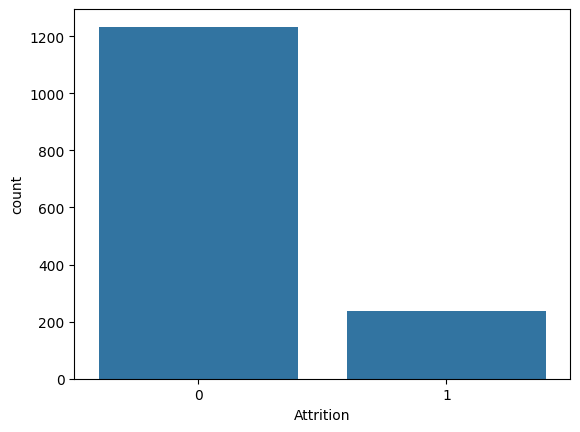

In [14]:
sns.countplot(x='Attrition', data=df)

### Finding the corelated features and droping them

In [15]:
cor = final_model.corr()

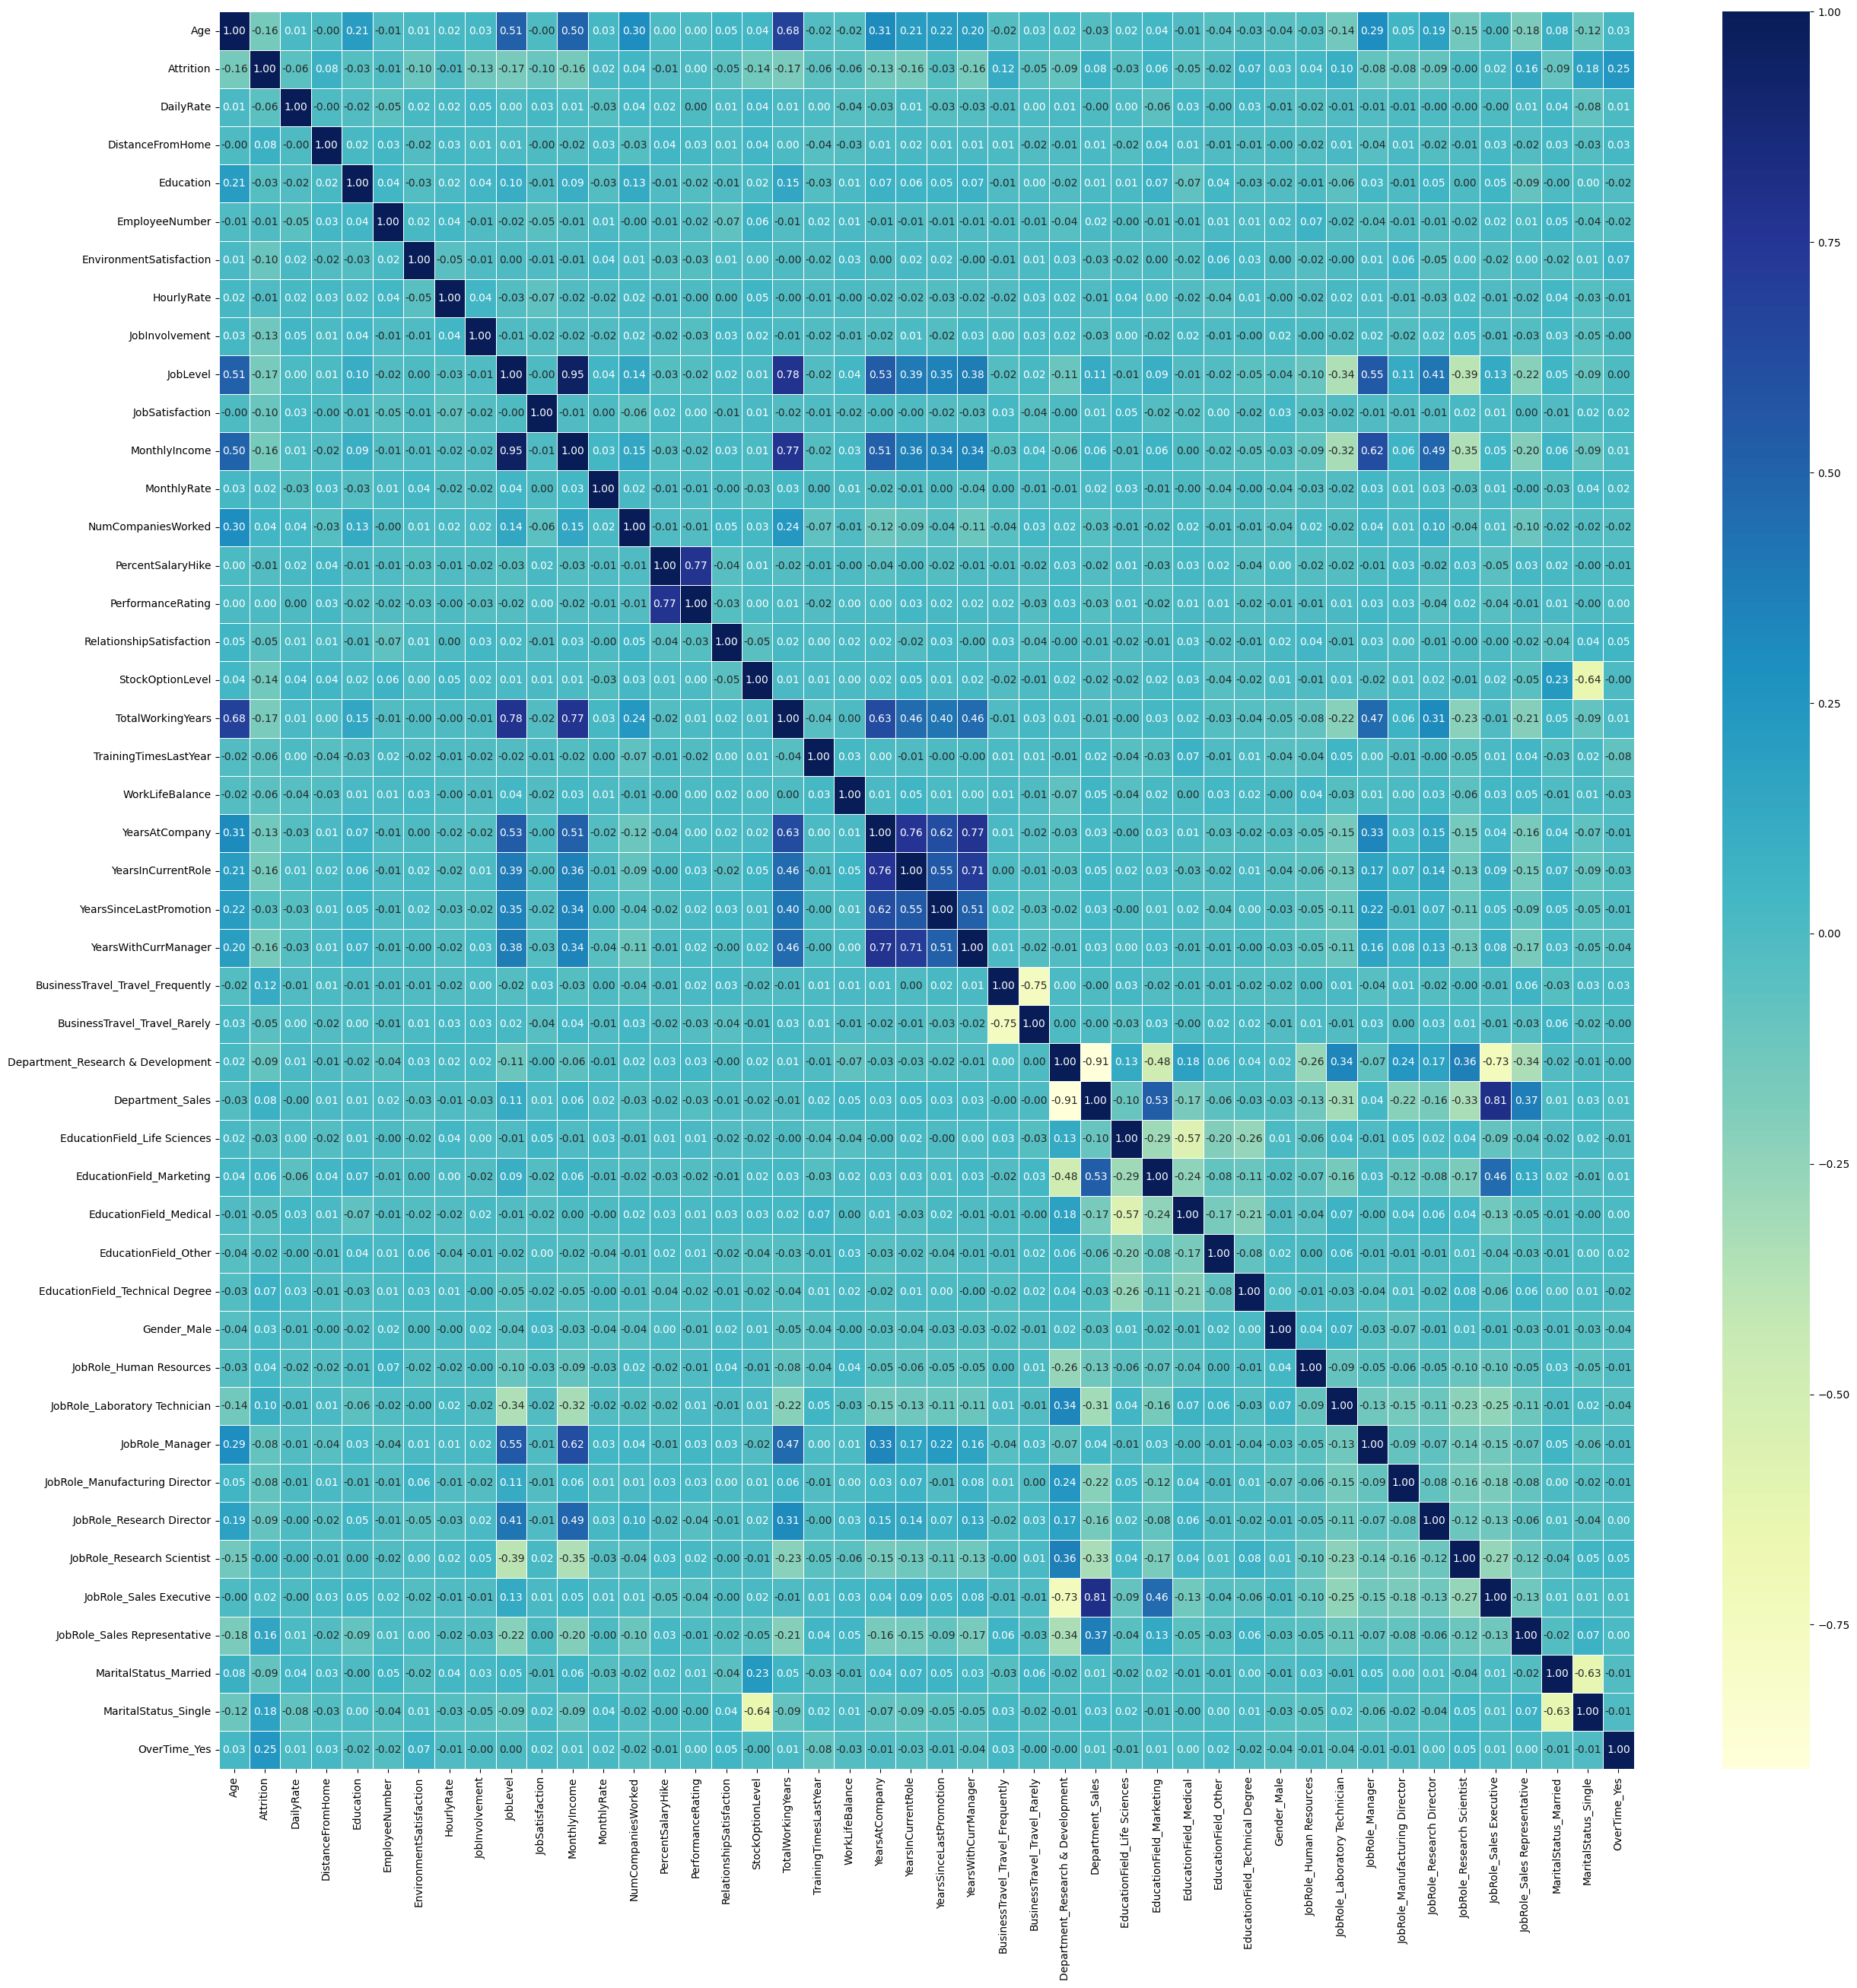

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(cor,annot=True,linewidths=.5, fmt=".2f", cmap="YlGnBu")
plt.show()

In [17]:
final_model.drop(columns=["YearsAtCompany","YearsInCurrentRole", "YearsWithCurrManager", "Department_Sales", "PerformanceRating",
                         "JobLevel", "MonthlyIncome", "Department_Research & Development", "TotalWorkingYears", "BusinessTravel_Travel_Rarely",
                         "MaritalStatus_Married","MaritalStatus_Single"], inplace=True)

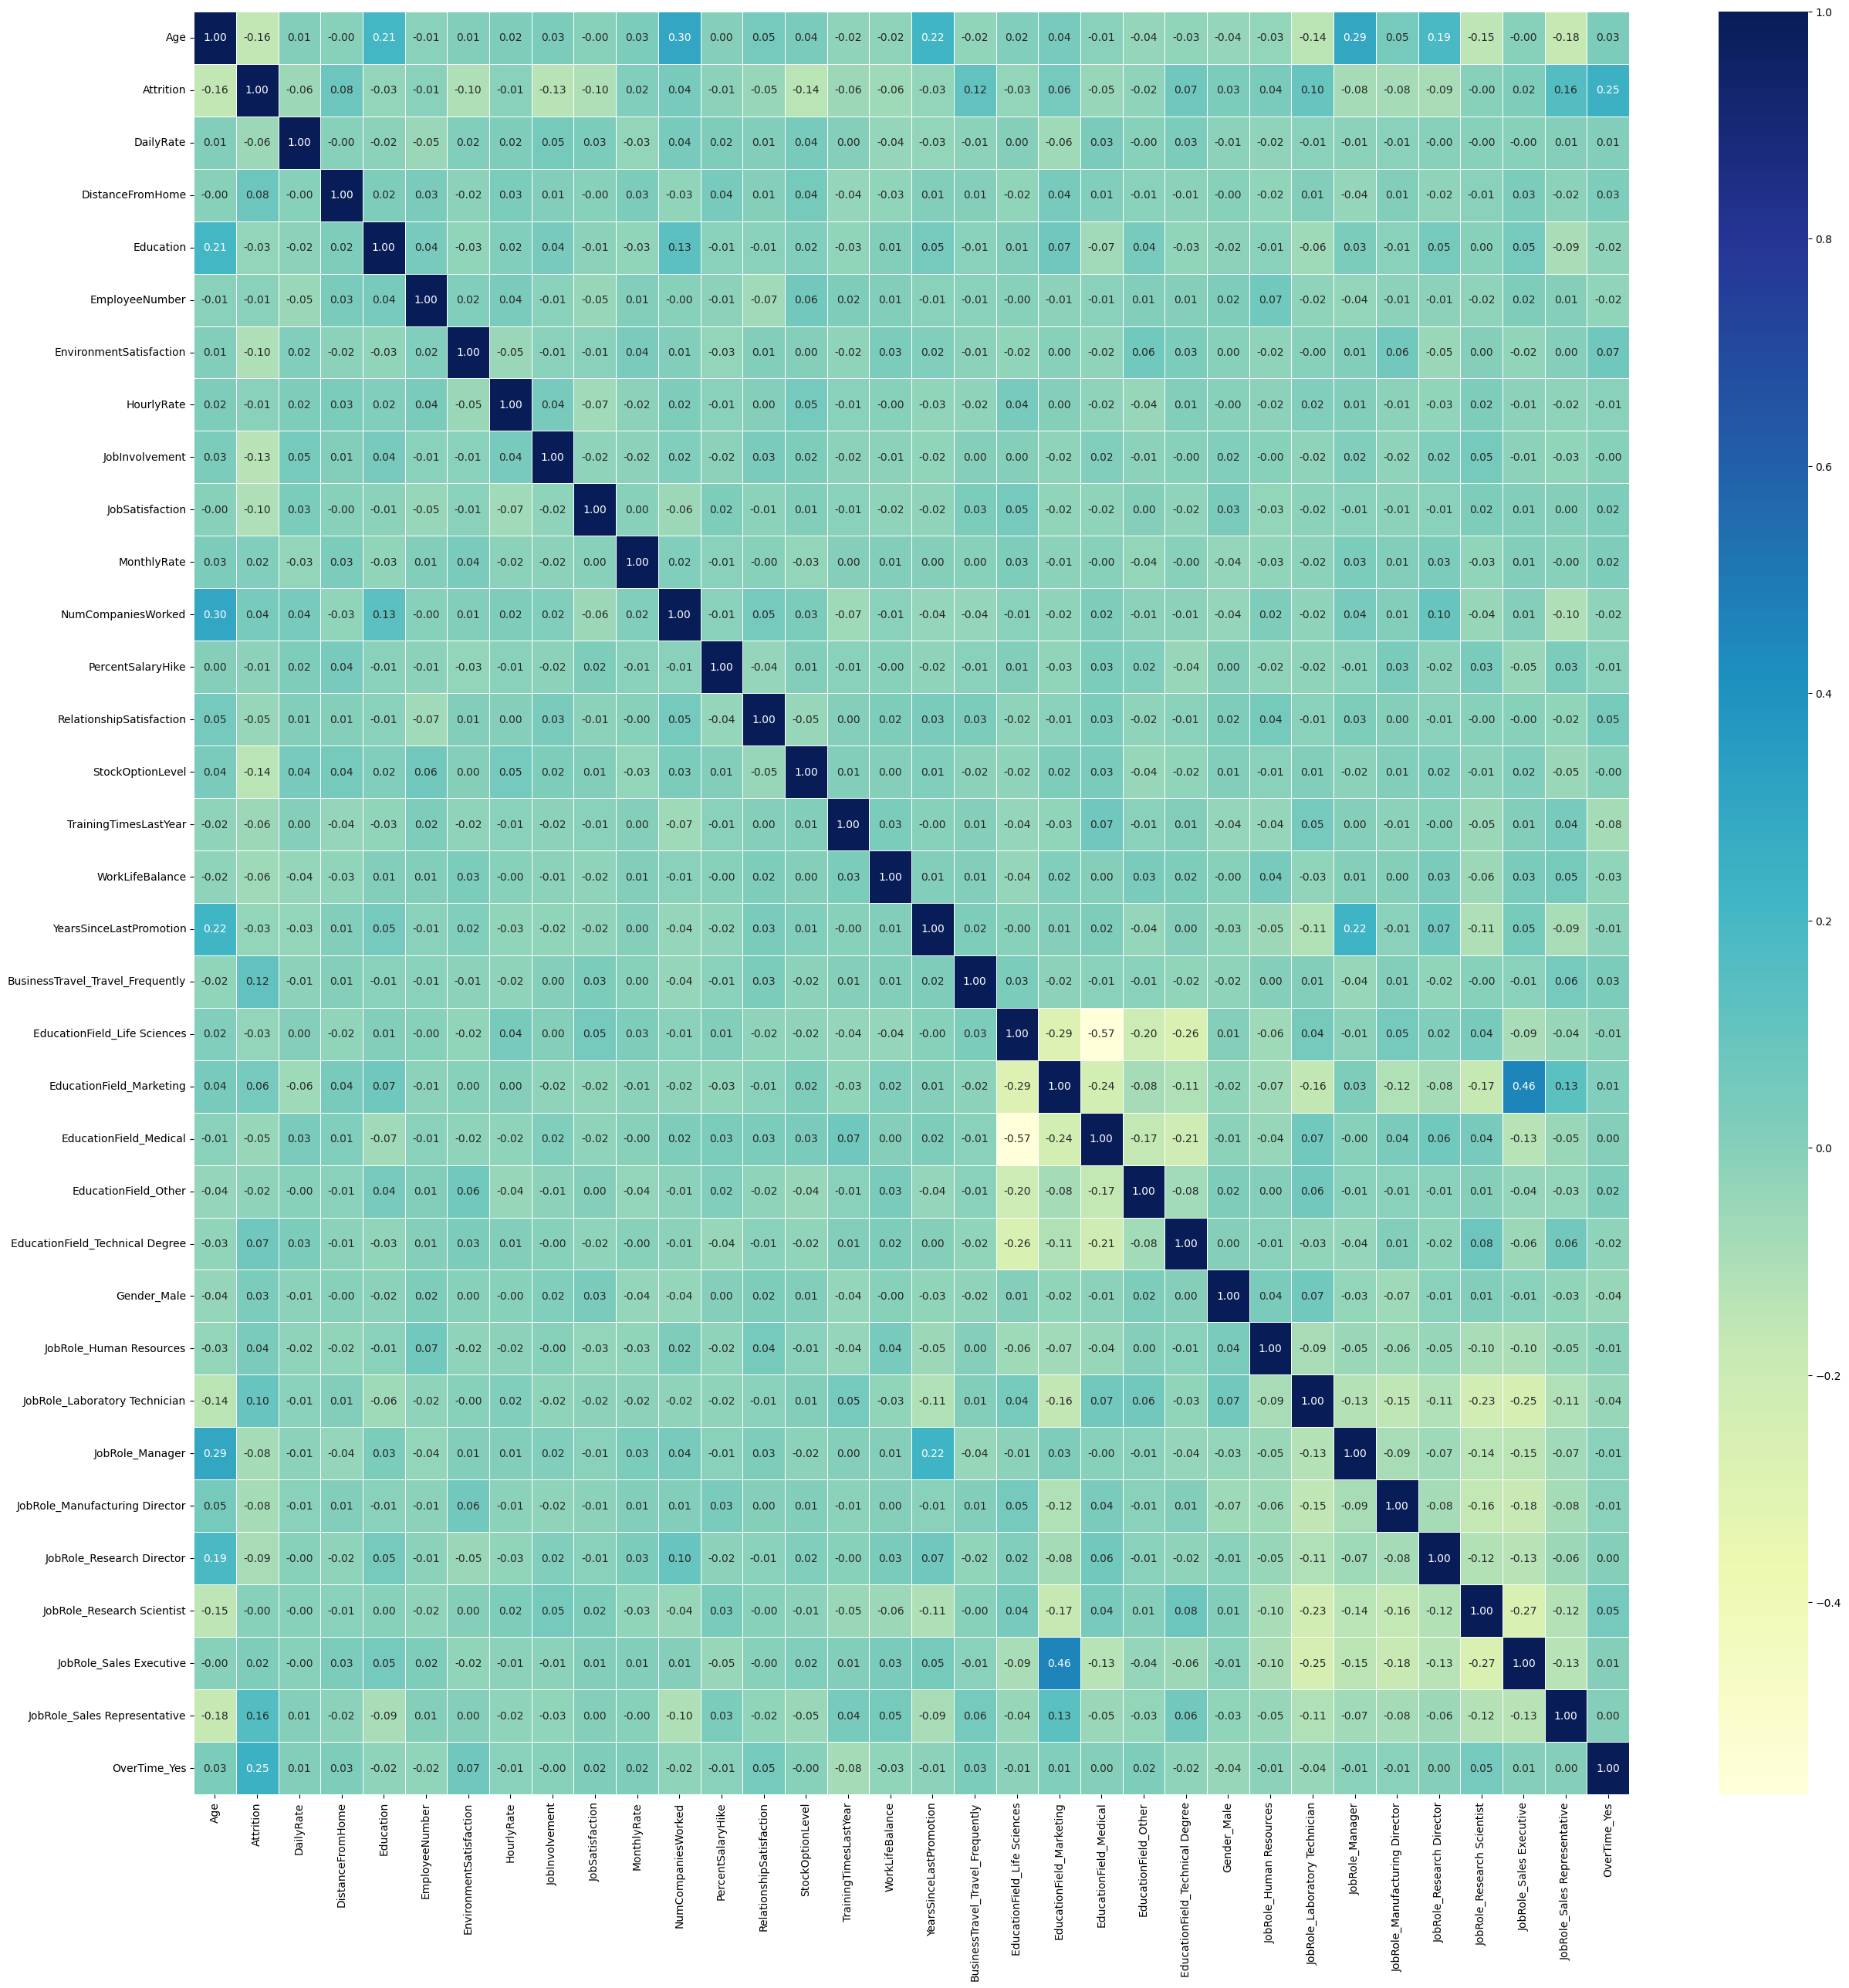

In [18]:
cor = final_model.corr()

plt.figure(figsize=(30,30))
sns.heatmap(cor,annot=True,linewidths=.5, fmt=".2f", cmap="YlGnBu")
plt.show()

# Creating Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [20]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [21]:
### Segrgate x and y features, creating train and test sets
x = final_model.drop(columns="Attrition")
y = final_model.Attrition
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [22]:
# Create Gaussian Naive Base Model
modelgauss = GaussianNB()

### train and predict using training data

In [23]:
modelgauss.fit(X_train, y_train)
train_pred = modelgauss.predict(X_train)

In [24]:
metrics.confusion_matrix(y_train, train_pred)

array([[832,  44],
       [ 89,  64]])

In [25]:
accuracy_percentage_train = (metrics.accuracy_score(y_train, train_pred)) * 100
accuracy_percentage_train

87.07482993197279

# Predict using Test Data

In [26]:
test_pred = modelgauss.predict(X_test)

In [27]:
metrics.confusion_matrix(y_test, test_pred)

array([[335,  22],
       [ 47,  37]])

In [28]:
accuracy_percentage_test = (metrics.accuracy_score(y_test, test_pred)) * 100
accuracy_percentage_test

84.35374149659864

In [29]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    876.0  153.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[876   0]
 [  0 153]]

Test Result:
Accuracy Score: 78.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.851064   0.430769  0.789116    0.640917      0.771008
recall       0.896359   0.333333  0.789116    0.614846      0.789116
f1-score     0.873124   0.375839  0.789116    0.624482      0.778403
support    357.000000  84.000000  0.789116  441.000000    441.000000
_______________________________________________
Conf

In [30]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 88.34%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.920000    0.627907  0.883382     0.773953      0.876569
recall       0.945205    0.529412  0.883382     0.737309      0.883382
f1-score     0.932432    0.574468  0.883382     0.753450      0.879207
support    876.000000  153.000000  0.883382  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[828  48]
 [ 72  81]]

Test Result:
Accuracy Score: 79.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.844156   0.428571  0.791383    0.636364      0.764997
recall       0.910364   0.285714  0.791383    0.598039      0.791383
f1-s

In [33]:
features = list(df.columns)
features=features.remove("Attrition")

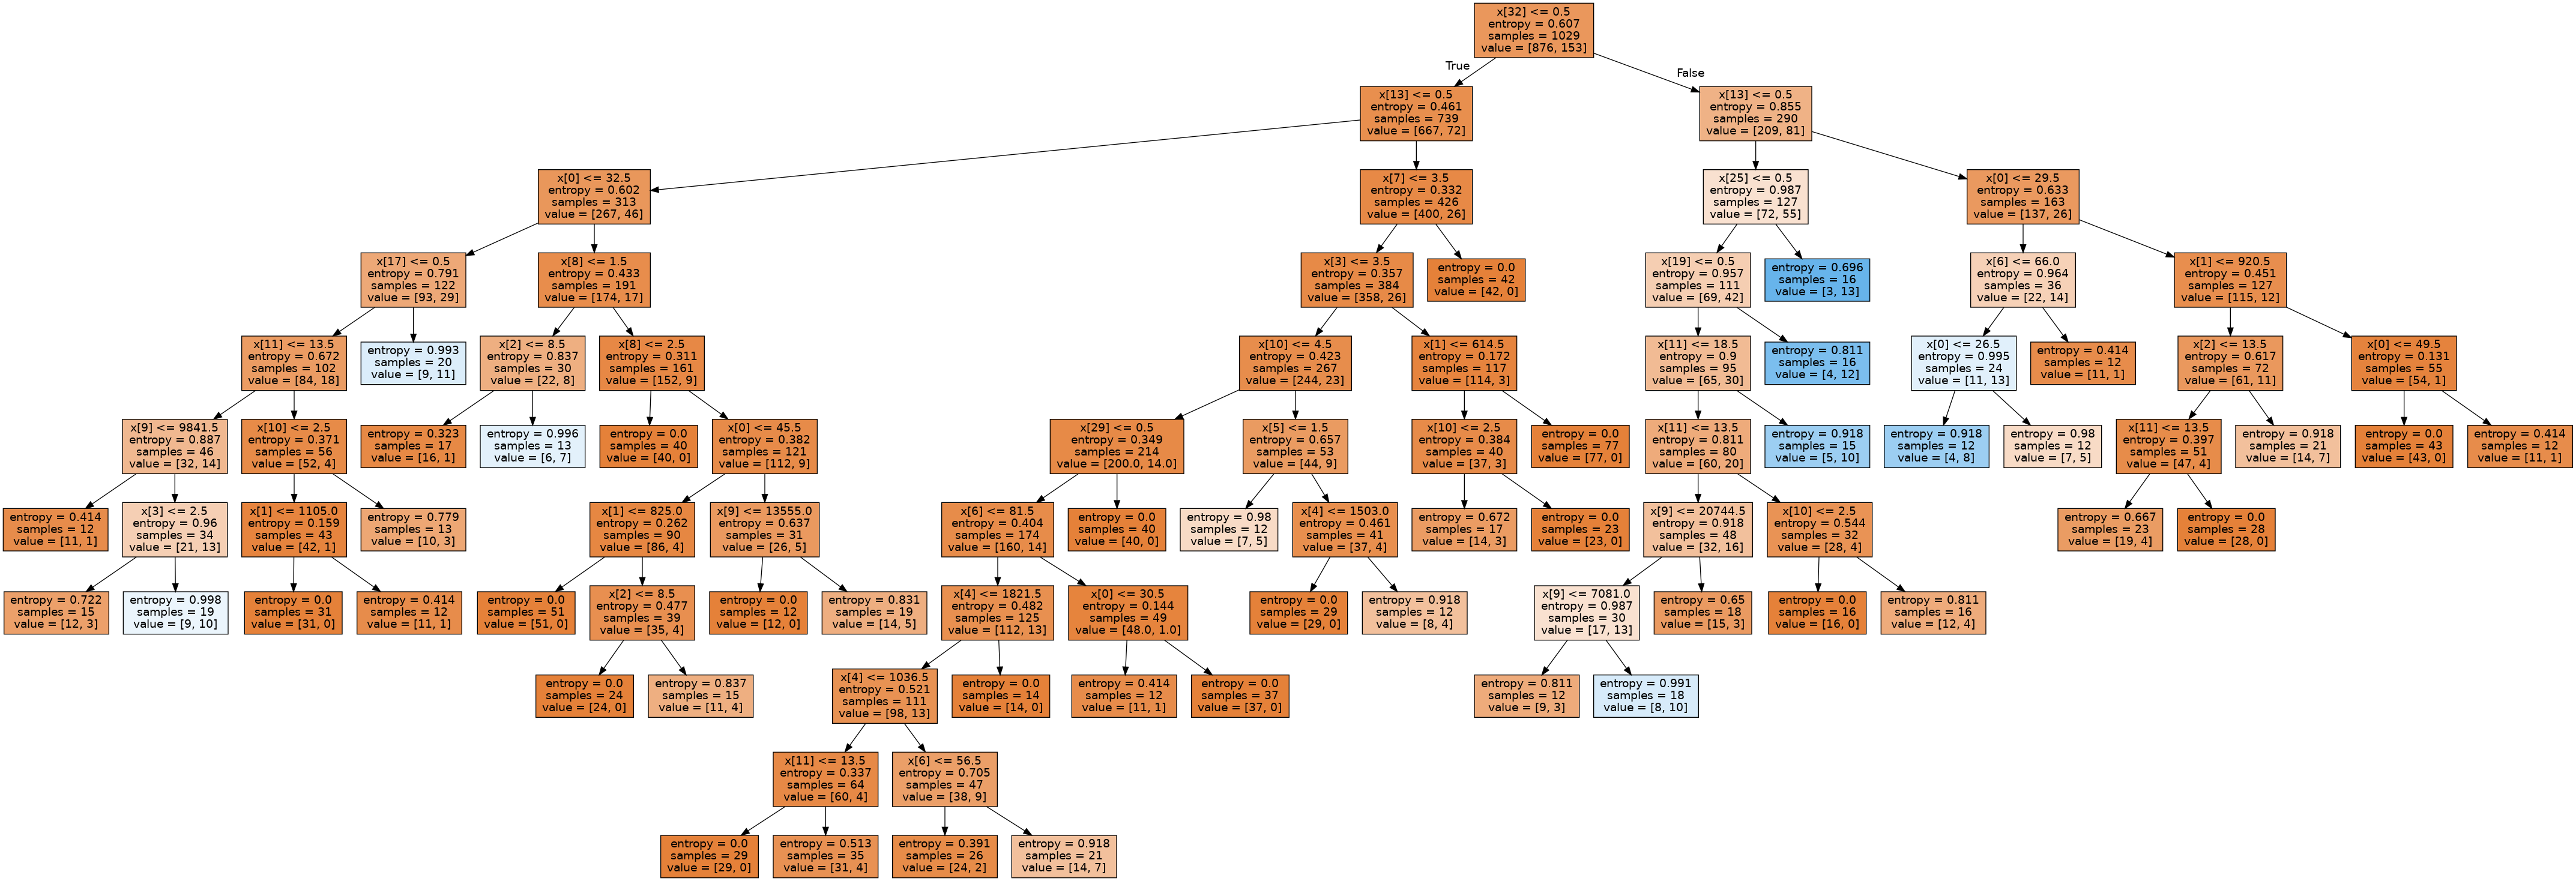

In [37]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    876.0  153.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[876   0]
 [  0 153]]

Test Result:
Accuracy Score: 82.09%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.820276   0.857143  0.820862    0.838710      0.827299
recall       0.997199   0.071429  0.820862    0.534314      0.820862
f1-score     0.900126   0.131868  0.820862    0.515997      0.753792
support    357.000000  84.000000  0.820862  441.000000    441.000000
_______________________________________________
Conf

In [39]:
### a) Randomized Search Cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    876.0  153.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[876   0]
 [  0 153]]

Test Result:
Accuracy Score: 82.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.823666   0.800000  0.823129    0.811833      0.819158
recall       0.994398   0.095238  0.823129    0.544818      0.823129
f1-score     0.901015   0.170213  0.823129 

In [40]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf, 
    params_grid, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    876.0  153.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[876   0]
 [  0 153]]

Test Result:
Accuracy Score: 82.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.825175   0.750000  0.823129    0.787587      0.810856
recall       0.991597   0.107143  0.823129    0.549370      0.823129
f1-score     0.900763   0.187500  0.82312